In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set()
import statsmodels.api as sm
from scipy import interpolate
from scipy import stats
from scipy import integrate
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
import re

In [4]:
r_and_d = 1000000000
first_stage = 36000000
second_stage = 12000000
fairings = 6000000
refurb = 1000000
fuel_and_other = 3000000

In [11]:
def reusable_rocket_cost(num_launches):
    original_launch = first_stage + second_stage + fairings + fuel_and_other 
    second_launch = first_stage*(1/num_launches) + second_stage + (1/num_launches)*fairings + fuel_and_other + refurb
    return second_launch + (10000000)

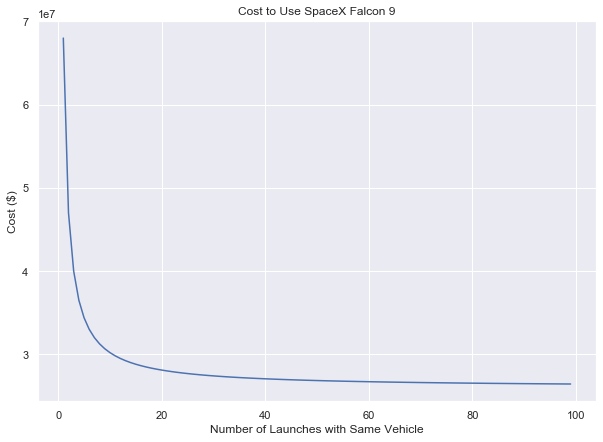

In [12]:
num_launches = np.arange(1, 100)
fig = plt.figure(figsize = (10,7))
sns.lineplot(num_launches, reusable_rocket_cost(num_launches));
plt.title('Cost to Use SpaceX Falcon 9');
plt.xlabel('Number of Launches with Same Vehicle');
plt.ylabel('Cost ($)');

#how to model potential cost-savings from reusable rocket launches (Elon Musk: 30% of savings will go to )